# Custom Layers using Keras

In [122]:
import tensorflow as tf
import numpy as np
import utils
import matplotlib.pyplot as plt
%matplotlib inline

# Import  Dataset

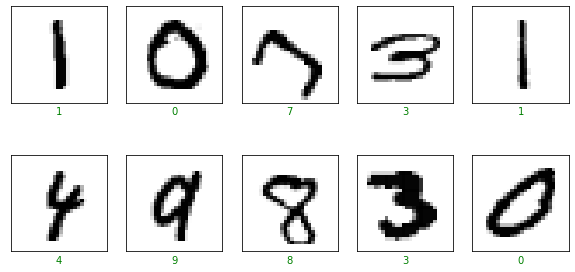

In [2]:
(x_train, y_train), (x_test, y_test)= utils.load_data()
utils.plot_random_examples(x_train, y_train).show()

# Creating a Custom Layer

In [132]:
class My_layer(tf.keras.layers.Layer):
    def __init__(self,units=32): #input de hiperparametros (neurônios, função de ativação, regularização, etc...)
        super().__init__()
        self.units = units
    def build(self, input_shape):
        self.W = self.add_weight(name= 'W', shape=(input_shape[1],self.units) ,initializer='random_normal',trainable=True)
        self.b = self.add_weight(name= 'b', shape=(self.units,) ,initializer='zeros',trainable=True)
    def call(self, X):
        z = tf.matmul(X, self.W) + self.b # função linear
        return tf.maximum(z,0) # função ativada pela função relu

# Creating the Model Including Custom Layer

In [134]:
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input((784,)))
    model.add(My_layer(64))
    #model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = create_model()
model.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer (My_layer)          (None, 64)                50240     
_________________________________________________________________
dense_62 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [128]:
model= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5 )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3041 - accuracy: 0.9141 - val_loss: 0.1739 - val_accuracy: 0.9480
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1468 - accuracy: 0.9565 - val_loss: 0.1279 - val_accuracy: 0.9620
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1078 - accuracy: 0.9681 - val_loss: 0.1101 - val_accuracy: 0.9674
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0853 - accuracy: 0.9744 - val_loss: 0.0979 - val_accuracy: 0.9693
Epoch 5/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0697 - accuracy: 0.9786 - val_loss: 0.0923 - val_accuracy: 0.9734


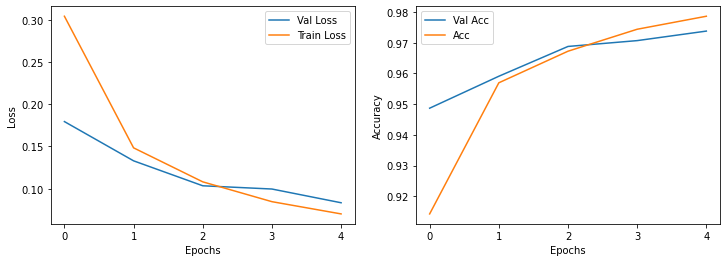

In [119]:
utils.plot_results(model).show()